<a href="https://colab.research.google.com/github/ChiuDeYuan/linear_regression_example/blob/main/housing_price_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多元線性迴歸MLR
### 中電會三月主題課程(2024/3/23)

<table class="tfo-notebook-buttons" align="left">
  <td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ChiuDeYuan/linear_regression_example/blob/main/housing_price_MLR.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ChiuDeYuan/linear_regression_example/blob/main/housing_price_MLR.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
</table>

## Useful links

* Housing Prices Dataset : https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
* Linear Models (Scikit-learn) : https://scikit-learn.org/stable/modules/linear_model.html

## Imports

In [1]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [2]:
import statsmodels.api as sm

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loads data

In [4]:
dataset_path = 'https://raw.githubusercontent.com/ChiuDeYuan/linear_regression_example/main/Housing.csv'
dataset = pd.read_csv(dataset_path)

In [5]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
dataset.shape

(545, 13)

## 準備資料

In [7]:
mapped_var = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def map_func(x):
    return x.map({'yes':1 , 'no':0})

dataset[mapped_var] = dataset[mapped_var].apply(map_func)

In [8]:
dataset = dataset.drop('furnishingstatus', axis=1)

In [9]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


## 縮放數據

In [10]:
scaler = StandardScaler()

vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
dataset[vars] = scaler.fit_transform(dataset[vars])

In [11]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0


In [12]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,2.085997e-16,-1.564498e-16,-1.825247e-16,-2.607496e-17,-1.303748e-16,0.858716,0.177982,0.350459,0.045872,0.315596,0.000000,0.234862
std,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,0.348635,0.382849,0.477552,0.209399,0.465180,1.000919,0.424302
min,-1.614327e+00,-1.614530e+00,-2.665004e+00,-5.701867e-01,-9.293967e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-0.805741,0.000000
25%,-7.153170e-01,-7.151451e-01,-1.308863e+00,-5.701867e-01,-9.293967e-01,1.000000,0.000000,0.000000,0.000000,0.000000,-0.805741,0.000000
50%,-2.283534e-01,-2.539222e-01,4.727831e-02,-5.701867e-01,2.244101e-01,1.000000,0.000000,0.000000,0.000000,0.000000,-0.805741,0.000000
75%,5.208214e-01,5.578300e-01,4.727831e-02,1.421812e+00,2.244101e-01,1.000000,0.000000,1.000000,0.000000,1.000000,0.355976,0.000000
max,4.566365e+00,5.096263e+00,4.115701e+00,5.405809e+00,2.532024e+00,1.000000,1.000000,1.000000,1.000000,1.000000,2.679409,1.000000


## 篩選特徵

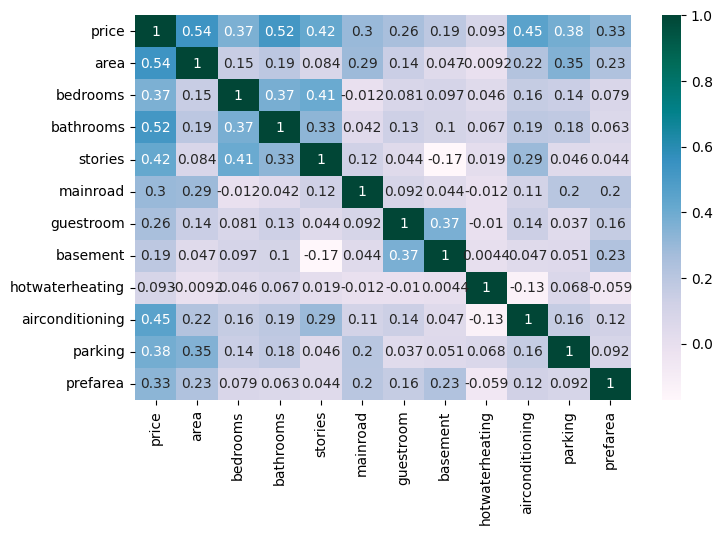

In [13]:
plt.figure(figsize = (8, 5))
sns.heatmap(dataset.corr(), annot = True, cmap="PuBuGn")
plt.show()

In [14]:
dataset_y = dataset.pop('price')
dataset_x = dataset

In [15]:
reg = linear_model.LinearRegression(fit_intercept = True)

In [16]:
rfe = RFE(reg, n_features_to_select=5)
rfe = rfe.fit(dataset_x, dataset_y)

In [17]:
list(zip(dataset_x.columns, rfe.support_, rfe.ranking_))

[('area', False, 2),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', False, 4),
 ('mainroad', True, 1),
 ('guestroom', False, 5),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 6),
 ('prefarea', True, 1)]

In [18]:
col = dataset_x.columns[rfe.support_]
col

Index(['bathrooms', 'mainroad', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [19]:
dataset_x = dataset_x[col]

In [20]:
dataset_x = sm.add_constant(dataset_x)

In [21]:
dataset_x.head()

,const,bathrooms,mainroad,hotwaterheating,airconditioning,prefarea
0,1.0,1.421812,1,0,1,1
1,1.0,5.405809,1,0,1,0
2,1.0,1.421812,1,0,0,1
3,1.0,1.421812,1,0,1,1
4,1.0,-0.570187,1,0,1,0


## 分割資料集

In [22]:
dataset_x, dataset_y = shuffle(dataset_x, dataset_y, random_state=0)

In [23]:
dataset_x_train = dataset_x[:-30]
dataset_x_test = dataset_x[-30:]

dataset_y_train = dataset_y[:-30]
dataset_y_test = dataset_y[-30:]

In [24]:
print(f"{dataset_x_train.shape}\n{dataset_x_test.shape}")

(515, 6)
(30, 6)


## 訓練模型

In [25]:
reg = sm.OLS(dataset_y_train,dataset_x_train).fit()

## 預測&評估

In [26]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     106.8
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           5.69e-77
Time:                        15:12:39   Log-Likelihood:                -547.60
No. Observations:                 515   AIC:                             1107.
Df Residuals:                     509   BIC:                             1133.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8748      0.083    -

In [27]:
prediction = reg.predict(dataset_x_test)

In [28]:
r2_score(dataset_y_test, prediction)

0.6697750199879197